In [540]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer

In [542]:
df = pd.read_csv('Amazon_data.csv')
df.head()

Smartphone              Rating  \
0  Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....  4.2 out of 5 stars   
1  Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...  4.2 out of 5 stars   
2  Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...  4.2 out of 5 stars   
3  Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...  4.2 out of 5 stars   
4  Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...  4.2 out of 5 stars   

  Reviews count Offer price Actual price             Saving  \
0        87,809      ₹9,499      ₹10,999  Save ₹1,500 (14%)   
1        74,587      ₹6,999       ₹8,499  Save ₹1,500 (18%)   
2        74,587      ₹6,999       ₹8,499  Save ₹1,500 (18%)   
3        95,519     ₹13,999      ₹15,999  Save ₹2,000 (13%)   
4        87,809      ₹9,499      ₹10,999  Save ₹1,500 (14%)   

                  Delivery Status of stock & more offers  
0  FREE Delivery by Amazon                           NaN  
1  FREE Delivery by Amazon                           NaN  
2  FREE Delivery by Amazon                           NaN  
3  FREE Delivery by Amazon                           NaN  
4  FREE Delivery by Amazon                           NaN

In [506]:
df.shape

(1367, 8)

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Smartphone                     1367 non-null   object
 1   Rating                         1367 non-null   object
 2   Reviews count                  1367 non-null   object
 3   Offer price                    1153 non-null   object
 4   Actual price                   1041 non-null   object
 5   Saving                         1150 non-null   object
 6   Delivery                       1367 non-null   object
 7   Status of stock & more offers  498 non-null    object
dtypes: object(8)
memory usage: 85.6+ KB


# Find and drop Duplicate Values

In [510]:
# identify duplicate records in the data set
len(df[df.duplicated()])

56

In [512]:
# Removing duplicates
df.drop_duplicates(keep='first',inplace=True) 

In [514]:
# Check for duplicate values again
len(df[df.duplicated()])

0

# Removing unwanted characters and changing the data type

In [516]:
df.head(2)

Smartphone              Rating  \
0  Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....  4.2 out of 5 stars   
1  Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...  4.2 out of 5 stars   

  Reviews count Offer price Actual price             Saving  \
0        87,809      ₹9,499      ₹10,999  Save ₹1,500 (14%)   
1        74,587      ₹6,999       ₹8,499  Save ₹1,500 (18%)   

                  Delivery Status of stock & more offers  
0  FREE Delivery by Amazon                           NaN  
1  FREE Delivery by Amazon                           NaN

# rating column 

In [544]:
# splitting the string and retriving the numeric value and converting the feature rating to float data type

# Step 1: Convert the 'Rating' column to string
df['Rating'] = df['Rating'].astype(str)

# Step 2: Replace empty strings with NaN
df['Rating'].replace('', np.nan, inplace=True)

# Step 3: Extract the numeric part using regex and convert to float
df['Rating'] = df['Rating'].str.extract(r'(\d+\.?\d*)').astype(float)

# Display the final DataFrame
df

C:\Users\vivek\AppData\Local\Temp\ipykernel_24660\777377104.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].replace('', np.nan, inplace=True)


Smartphone  Rating Reviews count  \
0     Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....     4.2        87,809   
1     Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...     4.2        74,587   
2     Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...     4.2        74,587   
3     Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...     4.2        95,519   
4     Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...     4.2        87,809   
5     Redmi 9 Power (Blazing Blue, 4GB RAM, 64GB Sto...     4.2        71,045   
6     Redmi 9A (Midnight Black, 2GB RAM, 32GB Storag...     4.3        17,145   
7     OnePlus Nord 2 5G (Blue Haze, 8GB RAM, 128GB S...     4.3        17,892   
8     OnePlus Nord CE 5G (Charcoal Ink, 8GB RAM, 128...     4.1        40,451   
9     Redmi 9 Prime (Space Blue, 4GB RAM, 64GB Stora...     4.3        64,895   
10    Redmi Note 10S (Deep Sea Blue, 6GB RAM, 64GB S...     4.1        12,900   
11    Samsung Galaxy M31 (Ocean Blue, 8GB RAM, 128GB...     4.3       243,715   
12    Redmi 9 (Sporty Orange, 4GB RAM, 64GB Storage)...     4.2        87,809   
13    Samsung Galaxy M21 2021 Edition (Arctic Blue, ...     4.2       170,469   
14    Redmi Note 10 Pro (Dark Night, 6GB RAM, 128GB ...     4.2        27,465   
15    OnePlus Nord CE 5G (Blue Void, 8GB RAM, 128GB ...     4.1        40,451   
16    Redmi 9 Power (Electric Green, 4GB RAM, 64GB S...     4.2        71,045   
17    Redmi Note 10 Pro (Glacial Blue, 6GB RAM, 128G...     4.2        27,465   
18    Redmi 9A (Sea Blue 3GB RAM 32GB Storage)| 2GHz...     4.2        74,587   
19                           NOKIA 105 Dual SIM (Black)     4.0        17,355   
20     Redmi Note 9 Shadow Black, 4GB RAM, 64GB Storage     4.3       103,817   
21    Redmi 9 Prime (Mint Green, 4GB RAM, 64GB Stora...     4.3        64,895   
22    Redmi 9 Prime (Matte Black, 4GB RAM, 64GB Stor...     4.3        64,895   
23    OnePlus Nord 2 5G (Gray Sierra, 8GB RAM, 128GB...     4.3        17,892   
24    realme C11 (2021) (Cool Grey, 2GB RAM, 32GB St...     4.1         3,700   
25    Samsung Galaxy M21 2021 Edition (Charcoal Blac...     4.2       170,469   
26    Redmi 9 Power (Mighty Black 4GB RAM 64GB Stora...     4.2        71,045   
27    Redmi 9 Power (Blazing Blue, 6GB RAM, 128GB St...     4.2        71,045   
28    Oppo A31 (Fantasy White, 6GB RAM, 128GB Storag...     4.2        28,547   
29    OnePlus Nord CE 5G (Charcoal Ink, 6GB RAM, 128...     4.1        40,451   
30                         Nokia 105 Single SIM (Black)     4.1        44,866   
31    Redmi Note 10S (Shadow Black, 6GB RAM, 64GB St...     4.1        12,900   
32    Redmi Note 10S (Shadow Black, 6GB RAM, 128GB S...     4.1        12,900   
33    OnePlus Nord 2 5G (Green Woods, 12GB RAM, 256G...     4.3        17,892   
34    Redmi Note 10 Pro (Vintage Bronze, 6GB RAM, 12...     4.2        27,465   
35    Tecno Spark 7T(Jewel Blue, 4GB RAM, 64GB Stora...     4.0         4,611   
36    Redmi Note 10 Pro Max (Dark Night, 6GB RAM, 12...     4.1        22,800   
37    Samsung Galaxy M12 (Blue,4GB RAM, 64GB Storage...     4.1        44,135   
38    Redmi Note 10 Pro Max (Glacial Blue, 6GB RAM, ...     4.1        22,800   
39    Redmi Note 10 Pro Max (Vintage Bronze, 6GB RAM...     4.1        22,800   
40    Samsung Galaxy M32 (Light Blue, 6GB RAM, 128GB...     4.2         6,129   
41    Redmi 9 Prime (Sunrise Flare, 4GB RAM, 64GB St...     4.3        64,895   
42    Oppo A31 (Mystery Black, 6GB RAM, 128GB Storag...     4.2        28,547   
43    OnePlus Nord 2 5G (Gray Sierra, 12GB RAM, 256G...     4.3        17,892   
44    OnePlus Nord 2 5G (Blue Haze, 12GB RAM, 256GB ...     4.3        17,892   
45    Samsung Galaxy M21 2021 Edition (Arctic Blue, ...     4.2       170,469   
46    Samsung Galaxy M32 (Black, 6GB RAM, 128GB Stor...     4.2         6,129   
47    OPPO A31 (Fantasy White, 4GB RAM, 64GB Storage...     4.2        28,547   
48    iQOO Z3 5G (Cyber Blue, 8GB RAM, 128GB Storage...     4.3        15,68

# Reviews 

In [552]:
# Replacing comma and converting feature 'Reviews count' as integer
# Example DataFrame (you already have this as your dataset)
# df = pd.DataFrame(...) 

# Step 1: Convert 'Reviews count' to string to ensure string operations work
df['Reviews count'] = df['Reviews count'].astype(str)

# Step 2: Replace empty strings or non-numeric entries with NaN
df['Reviews count'] = df['Reviews count'].replace(r'^\s*$', np.nan, regex=True)

# Step 3: Remove commas from the 'Reviews count' column
df['Reviews count'] = df['Reviews count'].str.replace(',', '')

# Step 4: Convert the column to numeric (float), handling errors, and then to integer
df['Reviews count'] = pd.to_numeric(df['Reviews count'], errors='coerce').fillna(0).astype(int)

# Display the updated DataFrame
df

Smartphone  Rating  \
0     Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....     4.2   
1     Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...     4.2   
2     Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...     4.2   
3     Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...     4.2   
4     Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...     4.2   
5     Redmi 9 Power (Blazing Blue, 4GB RAM, 64GB Sto...     4.2   
6     Redmi 9A (Midnight Black, 2GB RAM, 32GB Storag...     4.3   
7     OnePlus Nord 2 5G (Blue Haze, 8GB RAM, 128GB S...     4.3   
8     OnePlus Nord CE 5G (Charcoal Ink, 8GB RAM, 128...     4.1   
9     Redmi 9 Prime (Space Blue, 4GB RAM, 64GB Stora...     4.3   
10    Redmi Note 10S (Deep Sea Blue, 6GB RAM, 64GB S...     4.1   
11    Samsung Galaxy M31 (Ocean Blue, 8GB RAM, 128GB...     4.3   
12    Redmi 9 (Sporty Orange, 4GB RAM, 64GB Storage)...     4.2   
13    Samsung Galaxy M21 2021 Edition (Arctic Blue, ...     4.2   
14    Redmi Note 10 Pro (Dark Night, 6GB RAM, 128GB ...     4.2   
15    OnePlus Nord CE 5G (Blue Void, 8GB RAM, 128GB ...     4.1   
16    Redmi 9 Power (Electric Green, 4GB RAM, 64GB S...     4.2   
17    Redmi Note 10 Pro (Glacial Blue, 6GB RAM, 128G...     4.2   
18    Redmi 9A (Sea Blue 3GB RAM 32GB Storage)| 2GHz...     4.2   
19                           NOKIA 105 Dual SIM (Black)     4.0   
20     Redmi Note 9 Shadow Black, 4GB RAM, 64GB Storage     4.3   
21    Redmi 9 Prime (Mint Green, 4GB RAM, 64GB Stora...     4.3   
22    Redmi 9 Prime (Matte Black, 4GB RAM, 64GB Stor...     4.3   
23    OnePlus Nord 2 5G (Gray Sierra, 8GB RAM, 128GB...     4.3   
24    realme C11 (2021) (Cool Grey, 2GB RAM, 32GB St...     4.1   
25    Samsung Galaxy M21 2021 Edition (Charcoal Blac...     4.2   
26    Redmi 9 Power (Mighty Black 4GB RAM 64GB Stora...     4.2   
27    Redmi 9 Power (Blazing Blue, 6GB RAM, 128GB St...     4.2   
28    Oppo A31 (Fantasy White, 6GB RAM, 128GB Storag...     4.2   
29    OnePlus Nord CE 5G (Charcoal Ink, 6GB RAM, 128...     4.1   
30                         Nokia 105 Single SIM (Black)     4.1   
31    Redmi Note 10S (Shadow Black, 6GB RAM, 64GB St...     4.1   
32    Redmi Note 10S (Shadow Black, 6GB RAM, 128GB S...     4.1   
33    OnePlus Nord 2 5G (Green Woods, 12GB RAM, 256G...     4.3   
34    Redmi Note 10 Pro (Vintage Bronze, 6GB RAM, 12...     4.2   
35    Tecno Spark 7T(Jewel Blue, 4GB RAM, 64GB Stora...     4.0   
36    Redmi Note 10 Pro Max (Dark Night, 6GB RAM, 12...     4.1   
37    Samsung Galaxy M12 (Blue,4GB RAM, 64GB Storage...     4.1   
38    Redmi Note 10 Pro Max (Glacial Blue, 6GB RAM, ...     4.1   
39    Redmi Note 10 Pro Max (Vintage Bronze, 6GB RAM...     4.1   
40    Samsung Galaxy M32 (Light Blue, 6GB RAM, 128GB...     4.2   
41    Redmi 9 Prime (Sunrise Flare, 4GB RAM, 64GB St...     4.3   
42    Oppo A31 (Mystery Black, 6GB RAM, 128GB Storag...     4.2   
43    OnePlus Nord 2 5G (Gray Sierra, 12GB RAM, 256G...     4.3   
44    OnePlus Nord 2 5G (Blue Haze, 12GB RAM, 256GB ...     4.3   
45    Samsung Galaxy M21 2021 Edition (Arctic Blue, ...     4.2   
46    Samsung Galaxy M32 (Black, 6GB RAM, 128GB Stor...     4.2   
47    OPPO A31 (Fantasy White, 4GB RAM, 64GB Storage...     4.2   
48    iQOO Z3 5G (Cyber Blue, 8GB RAM, 128GB Storage...     4.3   
49    Redmi Note 10S (Frost White, 6GB RAM, 64GB Sto...     4.1   
50    OPPO A31 (Mystery Black, 4GB RAM, 64GB Storage...     4.2   
51    realme narzo 30 (Racing Blue, 6GB RAM, 128GB S...     4.0   
52    Redmi 9 Power (Mighty Black, 6GB RAM, 128GB St...     4.2   
53                          Nokia 105 Single SIM (Blue)     4.1   
54    Mi 10i 5G (Atlantic Blue, 6GB RAM, 128GB Stora...     4.2   
55    OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...     4.2   
56    Redmi 9 Power (Electric Green, 6GB RAM, 128GB ...     4.2   
57                             Samsung Guru 1200 (Gold)     4.2   
58    Redmi 9 Power (Fiery Red, 4GB RAM, 64GB Storag...     4.2   
59    Mi 11X 5G Celestial

# Price Column

In [554]:
# Replacing coma and converting feature 'Offer price' as integer.
# Step 1: Convert to string to ensure all entries are strings
df['Offer price'] = df['Offer price'].astype(str)
# Replace commas and any non-numeric characters
df['Offer price'] = df['Offer price'].str.replace(',', '')  # Remove commas
df['Offer price'] = df['Offer price'].str.replace('[^0-9]', '', regex=True)  # Keep only digits
# Replace empty strings with NaN
df['Offer price'] = df['Offer price'].replace('', None)
# Convert to float, then to int, handling NaN values
df['Offer price'] = df['Offer price'].astype(float).fillna(0).astype(int)
df

Smartphone  Rating  \
0     Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....     4.2   
1     Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...     4.2   
2     Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...     4.2   
3     Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...     4.2   
4     Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...     4.2   
5     Redmi 9 Power (Blazing Blue, 4GB RAM, 64GB Sto...     4.2   
6     Redmi 9A (Midnight Black, 2GB RAM, 32GB Storag...     4.3   
7     OnePlus Nord 2 5G (Blue Haze, 8GB RAM, 128GB S...     4.3   
8     OnePlus Nord CE 5G (Charcoal Ink, 8GB RAM, 128...     4.1   
9     Redmi 9 Prime (Space Blue, 4GB RAM, 64GB Stora...     4.3   
10    Redmi Note 10S (Deep Sea Blue, 6GB RAM, 64GB S...     4.1   
11    Samsung Galaxy M31 (Ocean Blue, 8GB RAM, 128GB...     4.3   
12    Redmi 9 (Sporty Orange, 4GB RAM, 64GB Storage)...     4.2   
13    Samsung Galaxy M21 2021 Edition (Arctic Blue, ...     4.2   
14    Redmi Note 10 Pro (Dark Night, 6GB RAM, 128GB ...     4.2   
15    OnePlus Nord CE 5G (Blue Void, 8GB RAM, 128GB ...     4.1   
16    Redmi 9 Power (Electric Green, 4GB RAM, 64GB S...     4.2   
17    Redmi Note 10 Pro (Glacial Blue, 6GB RAM, 128G...     4.2   
18    Redmi 9A (Sea Blue 3GB RAM 32GB Storage)| 2GHz...     4.2   
19                           NOKIA 105 Dual SIM (Black)     4.0   
20     Redmi Note 9 Shadow Black, 4GB RAM, 64GB Storage     4.3   
21    Redmi 9 Prime (Mint Green, 4GB RAM, 64GB Stora...     4.3   
22    Redmi 9 Prime (Matte Black, 4GB RAM, 64GB Stor...     4.3   
23    OnePlus Nord 2 5G (Gray Sierra, 8GB RAM, 128GB...     4.3   
24    realme C11 (2021) (Cool Grey, 2GB RAM, 32GB St...     4.1   
25    Samsung Galaxy M21 2021 Edition (Charcoal Blac...     4.2   
26    Redmi 9 Power (Mighty Black 4GB RAM 64GB Stora...     4.2   
27    Redmi 9 Power (Blazing Blue, 6GB RAM, 128GB St...     4.2   
28    Oppo A31 (Fantasy White, 6GB RAM, 128GB Storag...     4.2   
29    OnePlus Nord CE 5G (Charcoal Ink, 6GB RAM, 128...     4.1   
30                         Nokia 105 Single SIM (Black)     4.1   
31    Redmi Note 10S (Shadow Black, 6GB RAM, 64GB St...     4.1   
32    Redmi Note 10S (Shadow Black, 6GB RAM, 128GB S...     4.1   
33    OnePlus Nord 2 5G (Green Woods, 12GB RAM, 256G...     4.3   
34    Redmi Note 10 Pro (Vintage Bronze, 6GB RAM, 12...     4.2   
35    Tecno Spark 7T(Jewel Blue, 4GB RAM, 64GB Stora...     4.0   
36    Redmi Note 10 Pro Max (Dark Night, 6GB RAM, 12...     4.1   
37    Samsung Galaxy M12 (Blue,4GB RAM, 64GB Storage...     4.1   
38    Redmi Note 10 Pro Max (Glacial Blue, 6GB RAM, ...     4.1   
39    Redmi Note 10 Pro Max (Vintage Bronze, 6GB RAM...     4.1   
40    Samsung Galaxy M32 (Light Blue, 6GB RAM, 128GB...     4.2   
41    Redmi 9 Prime (Sunrise Flare, 4GB RAM, 64GB St...     4.3   
42    Oppo A31 (Mystery Black, 6GB RAM, 128GB Storag...     4.2   
43    OnePlus Nord 2 5G (Gray Sierra, 12GB RAM, 256G...     4.3   
44    OnePlus Nord 2 5G (Blue Haze, 12GB RAM, 256GB ...     4.3   
45    Samsung Galaxy M21 2021 Edition (Arctic Blue, ...     4.2   
46    Samsung Galaxy M32 (Black, 6GB RAM, 128GB Stor...     4.2   
47    OPPO A31 (Fantasy White, 4GB RAM, 64GB Storage...     4.2   
48    iQOO Z3 5G (Cyber Blue, 8GB RAM, 128GB Storage...     4.3   
49    Redmi Note 10S (Frost White, 6GB RAM, 64GB Sto...     4.1   
50    OPPO A31 (Mystery Black, 4GB RAM, 64GB Storage...     4.2   
51    realme narzo 30 (Racing Blue, 6GB RAM, 128GB S...     4.0   
52    Redmi 9 Power (Mighty Black, 6GB RAM, 128GB St...     4.2   
53                          Nokia 105 Single SIM (Blue)     4.1   
54    Mi 10i 5G (Atlantic Blue, 6GB RAM, 128GB Stora...     4.2   
55    OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...     4.2   
56    Redmi 9 Power (Electric Green, 6GB RAM, 128GB ...     4.2   
57                             Samsung Guru 1200 (Gold)     4.2   
58    Redmi 9 Power (Fiery Red, 4GB RAM, 64GB Storag...     4.2   
59    Mi 11X 5G Celestial

In [556]:
# since feature offer price is having null values, the nan values dtype will be float by default, if we try converting data type into integer it
# will throw an error so converting only not null values into integers
# After imputing null values we will convert those data types also
# Step 1: Convert to string to ensure all entries are strings
df['Offer price'] = df['Offer price'].astype(str)
# Replace commas and any non-numeric characters
df['Offer price'] = df['Offer price'].str.replace(',', '')  # Remove commas
df['Offer price'] = df['Offer price'].str.replace('[^0-9]', '', regex=True)  # Keep only digits
# Replace empty strings with NaN
df['Offer price'] = df['Offer price'].replace('', None)
# Convert to float and fill NaNs
df['Offer price'] = df['Offer price'].astype(float).fillna(0)
# Convert to integers safely
df['Offer price'] = pd.to_numeric(df['Offer price'], downcast='integer', errors='coerce')
df

Smartphone  Rating  \
0     Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....     4.2   
1     Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...     4.2   
2     Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...     4.2   
3     Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...     4.2   
4     Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...     4.2   
5     Redmi 9 Power (Blazing Blue, 4GB RAM, 64GB Sto...     4.2   
6     Redmi 9A (Midnight Black, 2GB RAM, 32GB Storag...     4.3   
7     OnePlus Nord 2 5G (Blue Haze, 8GB RAM, 128GB S...     4.3   
8     OnePlus Nord CE 5G (Charcoal Ink, 8GB RAM, 128...     4.1   
9     Redmi 9 Prime (Space Blue, 4GB RAM, 64GB Stora...     4.3   
10    Redmi Note 10S (Deep Sea Blue, 6GB RAM, 64GB S...     4.1   
11    Samsung Galaxy M31 (Ocean Blue, 8GB RAM, 128GB...     4.3   
12    Redmi 9 (Sporty Orange, 4GB RAM, 64GB Storage)...     4.2   
13    Samsung Galaxy M21 2021 Edition (Arctic Blue, ...     4.2   
14    Redmi Note 10 Pro (Dark Night, 6GB RAM, 128GB ...     4.2   
15    OnePlus Nord CE 5G (Blue Void, 8GB RAM, 128GB ...     4.1   
16    Redmi 9 Power (Electric Green, 4GB RAM, 64GB S...     4.2   
17    Redmi Note 10 Pro (Glacial Blue, 6GB RAM, 128G...     4.2   
18    Redmi 9A (Sea Blue 3GB RAM 32GB Storage)| 2GHz...     4.2   
19                           NOKIA 105 Dual SIM (Black)     4.0   
20     Redmi Note 9 Shadow Black, 4GB RAM, 64GB Storage     4.3   
21    Redmi 9 Prime (Mint Green, 4GB RAM, 64GB Stora...     4.3   
22    Redmi 9 Prime (Matte Black, 4GB RAM, 64GB Stor...     4.3   
23    OnePlus Nord 2 5G (Gray Sierra, 8GB RAM, 128GB...     4.3   
24    realme C11 (2021) (Cool Grey, 2GB RAM, 32GB St...     4.1   
25    Samsung Galaxy M21 2021 Edition (Charcoal Blac...     4.2   
26    Redmi 9 Power (Mighty Black 4GB RAM 64GB Stora...     4.2   
27    Redmi 9 Power (Blazing Blue, 6GB RAM, 128GB St...     4.2   
28    Oppo A31 (Fantasy White, 6GB RAM, 128GB Storag...     4.2   
29    OnePlus Nord CE 5G (Charcoal Ink, 6GB RAM, 128...     4.1   
30                         Nokia 105 Single SIM (Black)     4.1   
31    Redmi Note 10S (Shadow Black, 6GB RAM, 64GB St...     4.1   
32    Redmi Note 10S (Shadow Black, 6GB RAM, 128GB S...     4.1   
33    OnePlus Nord 2 5G (Green Woods, 12GB RAM, 256G...     4.3   
34    Redmi Note 10 Pro (Vintage Bronze, 6GB RAM, 12...     4.2   
35    Tecno Spark 7T(Jewel Blue, 4GB RAM, 64GB Stora...     4.0   
36    Redmi Note 10 Pro Max (Dark Night, 6GB RAM, 12...     4.1   
37    Samsung Galaxy M12 (Blue,4GB RAM, 64GB Storage...     4.1   
38    Redmi Note 10 Pro Max (Glacial Blue, 6GB RAM, ...     4.1   
39    Redmi Note 10 Pro Max (Vintage Bronze, 6GB RAM...     4.1   
40    Samsung Galaxy M32 (Light Blue, 6GB RAM, 128GB...     4.2   
41    Redmi 9 Prime (Sunrise Flare, 4GB RAM, 64GB St...     4.3   
42    Oppo A31 (Mystery Black, 6GB RAM, 128GB Storag...     4.2   
43    OnePlus Nord 2 5G (Gray Sierra, 12GB RAM, 256G...     4.3   
44    OnePlus Nord 2 5G (Blue Haze, 12GB RAM, 256GB ...     4.3   
45    Samsung Galaxy M21 2021 Edition (Arctic Blue, ...     4.2   
46    Samsung Galaxy M32 (Black, 6GB RAM, 128GB Stor...     4.2   
47    OPPO A31 (Fantasy White, 4GB RAM, 64GB Storage...     4.2   
48    iQOO Z3 5G (Cyber Blue, 8GB RAM, 128GB Storage...     4.3   
49    Redmi Note 10S (Frost White, 6GB RAM, 64GB Sto...     4.1   
50    OPPO A31 (Mystery Black, 4GB RAM, 64GB Storage...     4.2   
51    realme narzo 30 (Racing Blue, 6GB RAM, 128GB S...     4.0   
52    Redmi 9 Power (Mighty Black, 6GB RAM, 128GB St...     4.2   
53                          Nokia 105 Single SIM (Blue)     4.1   
54    Mi 10i 5G (Atlantic Blue, 6GB RAM, 128GB Stora...     4.2   
55    OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...     4.2   
56    Redmi 9 Power (Electric Green, 6GB RAM, 128GB ...     4.2   
57                             Samsung Guru 1200 (Gold)     4.2   
58    Redmi 9 Power (Fiery Red, 4GB RAM, 64GB Storag...     4.2   
59    Mi 11X 5G Celestial

In [526]:
# Replacing coma and converting feature 'Actual price' as integer.
# Step 1: Convert to string to ensure all entries are strings
df['Actual price'] = df['Actual price'].astype(str)
# Replace commas and any non-numeric characters
df['Actual price'] = df['Actual price'].str.replace(',', '')  # Remove commas
df['Actual price'] = df['Actual price'].str.replace('[^0-9]', '', regex=True)  # Keep only digits
# Replace empty strings with NaN
df['Actual price'] = df['Actual price'].replace('', None)
# Convert to float, then to int, handling NaN values
df['Actual price'] = df['Actual price'].astype(float).fillna(0).astype(int)
df

Smartphone  Rating  \
0     Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....     4.2   
1     Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...     4.2   
2     Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...     4.2   
3     Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...     4.2   
4     Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...     4.2   
5     Redmi 9 Power (Blazing Blue, 4GB RAM, 64GB Sto...     4.2   
6     Redmi 9A (Midnight Black, 2GB RAM, 32GB Storag...     4.3   
7     OnePlus Nord 2 5G (Blue Haze, 8GB RAM, 128GB S...     4.3   
8     OnePlus Nord CE 5G (Charcoal Ink, 8GB RAM, 128...     4.1   
9     Redmi 9 Prime (Space Blue, 4GB RAM, 64GB Stora...     4.3   
10    Redmi Note 10S (Deep Sea Blue, 6GB RAM, 64GB S...     4.1   
11    Samsung Galaxy M31 (Ocean Blue, 8GB RAM, 128GB...     4.3   
12    Redmi 9 (Sporty Orange, 4GB RAM, 64GB Storage)...     4.2   
13    Samsung Galaxy M21 2021 Edition (Arctic Blue, ...     4.2   
14    Redmi Note 10 Pro (Dark Night, 6GB RAM, 128GB ...     4.2   
15    OnePlus Nord CE 5G (Blue Void, 8GB RAM, 128GB ...     4.1   
16    Redmi 9 Power (Electric Green, 4GB RAM, 64GB S...     4.2   
17    Redmi Note 10 Pro (Glacial Blue, 6GB RAM, 128G...     4.2   
18    Redmi 9A (Sea Blue 3GB RAM 32GB Storage)| 2GHz...     4.2   
19                           NOKIA 105 Dual SIM (Black)     4.0   
20     Redmi Note 9 Shadow Black, 4GB RAM, 64GB Storage     4.3   
21    Redmi 9 Prime (Mint Green, 4GB RAM, 64GB Stora...     4.3   
22    Redmi 9 Prime (Matte Black, 4GB RAM, 64GB Stor...     4.3   
23    OnePlus Nord 2 5G (Gray Sierra, 8GB RAM, 128GB...     4.3   
24    realme C11 (2021) (Cool Grey, 2GB RAM, 32GB St...     4.1   
25    Samsung Galaxy M21 2021 Edition (Charcoal Blac...     4.2   
26    Redmi 9 Power (Mighty Black 4GB RAM 64GB Stora...     4.2   
27    Redmi 9 Power (Blazing Blue, 6GB RAM, 128GB St...     4.2   
28    Oppo A31 (Fantasy White, 6GB RAM, 128GB Storag...     4.2   
29    OnePlus Nord CE 5G (Charcoal Ink, 6GB RAM, 128...     4.1   
30                         Nokia 105 Single SIM (Black)     4.1   
31    Redmi Note 10S (Shadow Black, 6GB RAM, 64GB St...     4.1   
32    Redmi Note 10S (Shadow Black, 6GB RAM, 128GB S...     4.1   
33    OnePlus Nord 2 5G (Green Woods, 12GB RAM, 256G...     4.3   
34    Redmi Note 10 Pro (Vintage Bronze, 6GB RAM, 12...     4.2   
35    Tecno Spark 7T(Jewel Blue, 4GB RAM, 64GB Stora...     4.0   
36    Redmi Note 10 Pro Max (Dark Night, 6GB RAM, 12...     4.1   
37    Samsung Galaxy M12 (Blue,4GB RAM, 64GB Storage...     4.1   
38    Redmi Note 10 Pro Max (Glacial Blue, 6GB RAM, ...     4.1   
39    Redmi Note 10 Pro Max (Vintage Bronze, 6GB RAM...     4.1   
40    Samsung Galaxy M32 (Light Blue, 6GB RAM, 128GB...     4.2   
41    Redmi 9 Prime (Sunrise Flare, 4GB RAM, 64GB St...     4.3   
42    Oppo A31 (Mystery Black, 6GB RAM, 128GB Storag...     4.2   
43    OnePlus Nord 2 5G (Gray Sierra, 12GB RAM, 256G...     4.3   
44    OnePlus Nord 2 5G (Blue Haze, 12GB RAM, 256GB ...     4.3   
45    Samsung Galaxy M21 2021 Edition (Arctic Blue, ...     4.2   
46    Samsung Galaxy M32 (Black, 6GB RAM, 128GB Stor...     4.2   
47    OPPO A31 (Fantasy White, 4GB RAM, 64GB Storage...     4.2   
48    iQOO Z3 5G (Cyber Blue, 8GB RAM, 128GB Storage...     4.3   
49    Redmi Note 10S (Frost White, 6GB RAM, 64GB Sto...     4.1   
50    OPPO A31 (Mystery Black, 4GB RAM, 64GB Storage...     4.2   
51    realme narzo 30 (Racing Blue, 6GB RAM, 128GB S...     4.0   
52    Redmi 9 Power (Mighty Black, 6GB RAM, 128GB St...     4.2   
53                          Nokia 105 Single SIM (Blue)     4.1   
54    Mi 10i 5G (Atlantic Blue, 6GB RAM, 128GB Stora...     4.2   
55    OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...     4.2   
56    Redmi 9 Power (Electric Green, 6GB RAM, 128GB ...     4.2   
57                             Samsung Guru 1200 (Gold)     4.2   
58    Redmi 9 Power (Fiery Red, 4GB RAM, 64GB Storag...     4.2   
59    Mi 11X 5G Celestial

In [558]:
# since feature Actual price is having null values, the nan values dtype will be float by default, if we try converting data type into integer it
# will throw an error so converting only not null values into integers
# After imputing null values we will convert those data types also
# Step 1: Convert to string to ensure all entries are strings
df['Actual price'] = df['Actual price'].astype(str)
# Replace commas and any non-numeric characters
df['Actual price'] = df['Actual price'].str.replace(',', '')  # Remove commas
df['Actual price'] = df['Actual price'].str.replace('[^0-9]', '', regex=True)  # Keep only digits
# Replace empty strings with NaN
df['Actual price'] = df['Actual price'].replace('', None)
# Convert to float and fill NaNs
df['Actual price'] = df['Actual price'].astype(float).fillna(0)
# Convert to integers safely
df['Actual price'] = pd.to_numeric(df['Actual price'], downcast='integer', errors='coerce')
df

Smartphone  Rating  \
0     Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....     4.2   
1     Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...     4.2   
2     Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...     4.2   
3     Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...     4.2   
4     Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...     4.2   
5     Redmi 9 Power (Blazing Blue, 4GB RAM, 64GB Sto...     4.2   
6     Redmi 9A (Midnight Black, 2GB RAM, 32GB Storag...     4.3   
7     OnePlus Nord 2 5G (Blue Haze, 8GB RAM, 128GB S...     4.3   
8     OnePlus Nord CE 5G (Charcoal Ink, 8GB RAM, 128...     4.1   
9     Redmi 9 Prime (Space Blue, 4GB RAM, 64GB Stora...     4.3   
10    Redmi Note 10S (Deep Sea Blue, 6GB RAM, 64GB S...     4.1   
11    Samsung Galaxy M31 (Ocean Blue, 8GB RAM, 128GB...     4.3   
12    Redmi 9 (Sporty Orange, 4GB RAM, 64GB Storage)...     4.2   
13    Samsung Galaxy M21 2021 Edition (Arctic Blue, ...     4.2   
14    Redmi Note 10 Pro (Dark Night, 6GB RAM, 128GB ...     4.2   
15    OnePlus Nord CE 5G (Blue Void, 8GB RAM, 128GB ...     4.1   
16    Redmi 9 Power (Electric Green, 4GB RAM, 64GB S...     4.2   
17    Redmi Note 10 Pro (Glacial Blue, 6GB RAM, 128G...     4.2   
18    Redmi 9A (Sea Blue 3GB RAM 32GB Storage)| 2GHz...     4.2   
19                           NOKIA 105 Dual SIM (Black)     4.0   
20     Redmi Note 9 Shadow Black, 4GB RAM, 64GB Storage     4.3   
21    Redmi 9 Prime (Mint Green, 4GB RAM, 64GB Stora...     4.3   
22    Redmi 9 Prime (Matte Black, 4GB RAM, 64GB Stor...     4.3   
23    OnePlus Nord 2 5G (Gray Sierra, 8GB RAM, 128GB...     4.3   
24    realme C11 (2021) (Cool Grey, 2GB RAM, 32GB St...     4.1   
25    Samsung Galaxy M21 2021 Edition (Charcoal Blac...     4.2   
26    Redmi 9 Power (Mighty Black 4GB RAM 64GB Stora...     4.2   
27    Redmi 9 Power (Blazing Blue, 6GB RAM, 128GB St...     4.2   
28    Oppo A31 (Fantasy White, 6GB RAM, 128GB Storag...     4.2   
29    OnePlus Nord CE 5G (Charcoal Ink, 6GB RAM, 128...     4.1   
30                         Nokia 105 Single SIM (Black)     4.1   
31    Redmi Note 10S (Shadow Black, 6GB RAM, 64GB St...     4.1   
32    Redmi Note 10S (Shadow Black, 6GB RAM, 128GB S...     4.1   
33    OnePlus Nord 2 5G (Green Woods, 12GB RAM, 256G...     4.3   
34    Redmi Note 10 Pro (Vintage Bronze, 6GB RAM, 12...     4.2   
35    Tecno Spark 7T(Jewel Blue, 4GB RAM, 64GB Stora...     4.0   
36    Redmi Note 10 Pro Max (Dark Night, 6GB RAM, 12...     4.1   
37    Samsung Galaxy M12 (Blue,4GB RAM, 64GB Storage...     4.1   
38    Redmi Note 10 Pro Max (Glacial Blue, 6GB RAM, ...     4.1   
39    Redmi Note 10 Pro Max (Vintage Bronze, 6GB RAM...     4.1   
40    Samsung Galaxy M32 (Light Blue, 6GB RAM, 128GB...     4.2   
41    Redmi 9 Prime (Sunrise Flare, 4GB RAM, 64GB St...     4.3   
42    Oppo A31 (Mystery Black, 6GB RAM, 128GB Storag...     4.2   
43    OnePlus Nord 2 5G (Gray Sierra, 12GB RAM, 256G...     4.3   
44    OnePlus Nord 2 5G (Blue Haze, 12GB RAM, 256GB ...     4.3   
45    Samsung Galaxy M21 2021 Edition (Arctic Blue, ...     4.2   
46    Samsung Galaxy M32 (Black, 6GB RAM, 128GB Stor...     4.2   
47    OPPO A31 (Fantasy White, 4GB RAM, 64GB Storage...     4.2   
48    iQOO Z3 5G (Cyber Blue, 8GB RAM, 128GB Storage...     4.3   
49    Redmi Note 10S (Frost White, 6GB RAM, 64GB Sto...     4.1   
50    OPPO A31 (Mystery Black, 4GB RAM, 64GB Storage...     4.2   
51    realme narzo 30 (Racing Blue, 6GB RAM, 128GB S...     4.0   
52    Redmi 9 Power (Mighty Black, 6GB RAM, 128GB St...     4.2   
53                          Nokia 105 Single SIM (Blue)     4.1   
54    Mi 10i 5G (Atlantic Blue, 6GB RAM, 128GB Stora...     4.2   
55    OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...     4.2   
56    Redmi 9 Power (Electric Green, 6GB RAM, 128GB ...     4.2   
57                             Samsung Guru 1200 (Gold)     4.2   
58    Redmi 9 Power (Fiery Red, 4GB RAM, 64GB Storag...     4.2   
59    Mi 11X 5G Celestial

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1311 entries, 0 to 1366
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Smartphone                     1311 non-null   object 
 1   Rating                         1311 non-null   float64
 2   Reviews count                  1311 non-null   int32  
 3   Offer price                    1311 non-null   int32  
 4   Actual price                   1311 non-null   int32  
 5   Saving                         1102 non-null   object 
 6   Delivery                       1311 non-null   object 
 7   Status of stock & more offers  473 non-null    object 
dtypes: float64(1), int32(3), object(4)
memory usage: 76.8+ KB


# Saving 

In [562]:
# Step 1: Convert to string to ensure all entries are strings
df['Saving'] = df['Saving'].astype(str)

# Step 2: Replace commas and any non-numeric characters (like currency symbols)
df['Saving'] = df['Saving'].str.replace(',', '')  # Remove commas
df['Saving'] = df['Saving'].str.replace('[^0-9]', '', regex=True)  # Keep only digits

# Step 3: Replace empty strings with NaN
df['Saving'] = df['Saving'].replace('', None)

# Step 4: Keep only the first 4 digits
df['Saving'] = df['Saving'].str[:4]  # Slicing to keep only the first 4 digits

# Step 5: Convert to float and fill NaNs
df['Saving'] = df['Saving'].astype(float).fillna(0)

# Step 6: Convert to integers safely
df['Saving'] = pd.to_numeric(df['Saving'], downcast='integer', errors='coerce')

# Display the updated DataFrame
df

Smartphone  Rating  \
0     Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....     4.2   
1     Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...     4.2   
2     Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...     4.2   
3     Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...     4.2   
4     Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...     4.2   
5     Redmi 9 Power (Blazing Blue, 4GB RAM, 64GB Sto...     4.2   
6     Redmi 9A (Midnight Black, 2GB RAM, 32GB Storag...     4.3   
7     OnePlus Nord 2 5G (Blue Haze, 8GB RAM, 128GB S...     4.3   
8     OnePlus Nord CE 5G (Charcoal Ink, 8GB RAM, 128...     4.1   
9     Redmi 9 Prime (Space Blue, 4GB RAM, 64GB Stora...     4.3   
10    Redmi Note 10S (Deep Sea Blue, 6GB RAM, 64GB S...     4.1   
11    Samsung Galaxy M31 (Ocean Blue, 8GB RAM, 128GB...     4.3   
12    Redmi 9 (Sporty Orange, 4GB RAM, 64GB Storage)...     4.2   
13    Samsung Galaxy M21 2021 Edition (Arctic Blue, ...     4.2   
14    Redmi Note 10 Pro (Dark Night, 6GB RAM, 128GB ...     4.2   
15    OnePlus Nord CE 5G (Blue Void, 8GB RAM, 128GB ...     4.1   
16    Redmi 9 Power (Electric Green, 4GB RAM, 64GB S...     4.2   
17    Redmi Note 10 Pro (Glacial Blue, 6GB RAM, 128G...     4.2   
18    Redmi 9A (Sea Blue 3GB RAM 32GB Storage)| 2GHz...     4.2   
19                           NOKIA 105 Dual SIM (Black)     4.0   
20     Redmi Note 9 Shadow Black, 4GB RAM, 64GB Storage     4.3   
21    Redmi 9 Prime (Mint Green, 4GB RAM, 64GB Stora...     4.3   
22    Redmi 9 Prime (Matte Black, 4GB RAM, 64GB Stor...     4.3   
23    OnePlus Nord 2 5G (Gray Sierra, 8GB RAM, 128GB...     4.3   
24    realme C11 (2021) (Cool Grey, 2GB RAM, 32GB St...     4.1   
25    Samsung Galaxy M21 2021 Edition (Charcoal Blac...     4.2   
26    Redmi 9 Power (Mighty Black 4GB RAM 64GB Stora...     4.2   
27    Redmi 9 Power (Blazing Blue, 6GB RAM, 128GB St...     4.2   
28    Oppo A31 (Fantasy White, 6GB RAM, 128GB Storag...     4.2   
29    OnePlus Nord CE 5G (Charcoal Ink, 6GB RAM, 128...     4.1   
30                         Nokia 105 Single SIM (Black)     4.1   
31    Redmi Note 10S (Shadow Black, 6GB RAM, 64GB St...     4.1   
32    Redmi Note 10S (Shadow Black, 6GB RAM, 128GB S...     4.1   
33    OnePlus Nord 2 5G (Green Woods, 12GB RAM, 256G...     4.3   
34    Redmi Note 10 Pro (Vintage Bronze, 6GB RAM, 12...     4.2   
35    Tecno Spark 7T(Jewel Blue, 4GB RAM, 64GB Stora...     4.0   
36    Redmi Note 10 Pro Max (Dark Night, 6GB RAM, 12...     4.1   
37    Samsung Galaxy M12 (Blue,4GB RAM, 64GB Storage...     4.1   
38    Redmi Note 10 Pro Max (Glacial Blue, 6GB RAM, ...     4.1   
39    Redmi Note 10 Pro Max (Vintage Bronze, 6GB RAM...     4.1   
40    Samsung Galaxy M32 (Light Blue, 6GB RAM, 128GB...     4.2   
41    Redmi 9 Prime (Sunrise Flare, 4GB RAM, 64GB St...     4.3   
42    Oppo A31 (Mystery Black, 6GB RAM, 128GB Storag...     4.2   
43    OnePlus Nord 2 5G (Gray Sierra, 12GB RAM, 256G...     4.3   
44    OnePlus Nord 2 5G (Blue Haze, 12GB RAM, 256GB ...     4.3   
45    Samsung Galaxy M21 2021 Edition (Arctic Blue, ...     4.2   
46    Samsung Galaxy M32 (Black, 6GB RAM, 128GB Stor...     4.2   
47    OPPO A31 (Fantasy White, 4GB RAM, 64GB Storage...     4.2   
48    iQOO Z3 5G (Cyber Blue, 8GB RAM, 128GB Storage...     4.3   
49    Redmi Note 10S (Frost White, 6GB RAM, 64GB Sto...     4.1   
50    OPPO A31 (Mystery Black, 4GB RAM, 64GB Storage...     4.2   
51    realme narzo 30 (Racing Blue, 6GB RAM, 128GB S...     4.0   
52    Redmi 9 Power (Mighty Black, 6GB RAM, 128GB St...     4.2   
53                          Nokia 105 Single SIM (Blue)     4.1   
54    Mi 10i 5G (Atlantic Blue, 6GB RAM, 128GB Stora...     4.2   
55    OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...     4.2   
56    Redmi 9 Power (Electric Green, 6GB RAM, 128GB ...     4.2   
57                             Samsung Guru 1200 (Gold)     4.2   
58    Redmi 9 Power (Fiery Red, 4GB RAM, 64GB Storag...     4.2   
59    Mi 11X 5G Celestial

# One Hot Encoding

In [361]:
df.shape

(1367, 8)

In [363]:
df['Delivery'].unique()

array(['FREE Delivery by Amazon', 'Paid', 'First Order Free Delivery'],
      dtype=object)

In [369]:
pd.get_dummies(df['Delivery'])

FREE Delivery by Amazon  First Order Free Delivery   Paid
0                        True                      False  False
1                        True                      False  False
2                        True                      False  False
3                        True                      False  False
4                        True                      False  False
5                        True                      False  False
6                       False                      False   True
7                       False                      False   True
8                       False                      False   True
9                        True                      False  False
10                       True                      False  False
11                       True                      False  False
12                       True                      False  False
13                       True                      False  False
14                       True                      False  False
15                      False                      False   True
16                       True                      False  False
17                       True                      False  False
18                       True                      False  False
19                       True                      False  False
20                       True                      False  False
21                       True                      False  False
22                       True                      False  False
23                      False                      False   True
24                       True                      False  False
25                       True                      False  False
26                      False                      False   True
27                       True                      False  False
28                       True                      False  False
29                      False                      False   True
30                      False                      False   True
31                       True                      False  False
32                       True                      False  False
33                      False                      False   True
34                       True                      False  False
35                       True                      False  False
36                       True                      False  False
37                       True                      False  False
38                       True                      False  False
39                       True                      False  False
40                       True                      False  False
41                       True                      False  False
42                       True                      False  False
43                      False                      False   True
44                      False                      False   True
45                       True                      False  False
46                       True                      False  False
47                       True                      False  False
48                       True                      False  False
49                       True                      False  False
50                       True                      False  False
51                       True                      False  False
52                      False                      False   True
53                      False                      False   True
54                       True                      False  False
55                       True                      False  False
56                       True                      False  False
57                      False                      False   True
58                       True                      False  False
59                       True                      False  False
60                      False                      False   True
61                       True         

# Label Encoding

In [328]:
dfc = df.copy()

In [344]:
from sklearn.preprocessing import LabelEncoder

In [338]:
Le = LabelEncoder()

In [367]:
arr = Le.fit_transform(dfc['Delivery'])	
# when we label encode the data the output will be in the form of the array
delivery = pd.DataFrame(arr,columns=['Delivery'])
delivery.value_counts()

Delivery
2           683
0           604
1            80
Name: count, dtype: int64

# Dealing with missing values 

In [359]:
# Checking null Values
df.isnull().sum()

Smartphone                         0
Rating                             0
Reviews count                      0
Offer price                      214
Actual price                     326
Saving                           217
Delivery                           0
Status of stock & more offers    869
dtype: int64

In [371]:
# Checking null values in percentage
df.isnull().sum()/len(df)*100

Smartphone                        0.000000
Rating                            0.000000
Reviews count                     0.000000
Offer price                      15.654718
Actual price                     23.847842
Saving                           15.874177
Delivery                          0.000000
Status of stock & more offers    63.569861
dtype: float64

In [385]:
# What isnull() function recognises as missing values
pd.DataFrame({'value' : df['Offer price'], 'Missing?' : df['Offer price'].isnull()}).head(10)

value  Missing?
0   9499     False
1   6999     False
2   6999     False
3  13999     False
4   9499     False
5  11499     False
6   6999     False
7      0     False
8  24999     False
9  10499     False

In [403]:
# Dropping features having more than 45% null values
df.drop(['Status of stock & more offers'], axis=1, inplace=True, errors='ignore')

C:\Users\vivek\AppData\Local\Temp\ipykernel_24660\3485785773.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Offer price'])


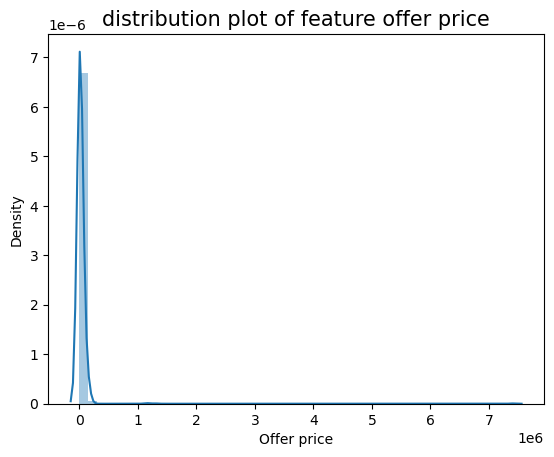

In [417]:
# price column 
sns.distplot(df['Offer price'])
plt.title('distribution plot of feature offer price',fontsize=15)
plt.show()

C:\Users\vivek\AppData\Local\Temp\ipykernel_24660\3957883133.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Actual price'])


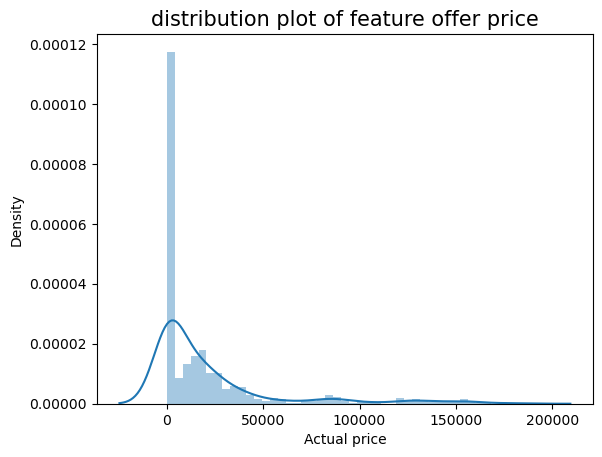

In [421]:
# price column 
sns.distplot(df['Actual price'])
plt.title('distribution plot of feature offer price',fontsize=15)
plt.show()

# since all the numeric features are skewed, lets treat those missing values using median imputation and KNN  imputation technique

In [424]:
df['Offer price'] = df['Offer price'].fillna(df['Offer price'].median())

In [436]:
# KNN Imputation Technique
imputer = KNNImputer(n_neighbors=1)
df.iloc[:,[4,5]]= imputer.fit_transform(df.iloc[:,[4,5]])

In [438]:
df.isnull().sum()

Smartphone                       0
Rating                           0
Reviews count                    0
Offer price                      0
Actual price                     0
Saving                           0
Delivery                         0
Status of stock & more offers    3
dtype: int64

In [564]:
# Now we have imputed null values, lets convert variable datatypes to its suitable datatypes.
df[['Offer price','Actual price','Saving']] = df[['Offer price','Actual price','Saving']].astype(int)

In [566]:
df1 = df.copy()

In [568]:
df.describe()

Rating  Reviews count   Offer price   Actual price       Saving
count  1367.000000    1367.000000  1.367000e+03    1367.000000  1367.000000
mean      4.349963    7100.891002  2.874453e+04   21176.687637  2614.466715
std       0.326656   20945.438524  2.099227e+05   34796.804897  2457.271332
min       4.000000       1.000000  0.000000e+00       0.000000     0.000000
25%       4.100000       7.000000  1.027000e+03     999.000000   638.000000
50%       4.200000     308.000000  9.780000e+03    5098.000000  2000.000000
75%       4.600000    2260.000000  2.249500e+04   23990.000000  4002.000000
max       5.000000  243715.000000  7.409164e+06  184800.000000  9991.000000